# **Importing All Libraries**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots inside the notebook
%matplotlib inline

# **Loading the Data**

In [231]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/List of Countries by Sugarcane Production.csv")

In [118]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# **Starting Data Cleaning**

In [119]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# **Removing Space in Columns**

In [120]:
df.rename(columns={'Production (Tons)':'Production_(Tons)'},inplace=True)
df.rename(columns={'Production per Person (Kg)':'Production per Person_(Kg)'},inplace=True)
df.rename(columns={'Acreage (Hectare)':'Acreage_(Hectare)'},inplace=True)
df.rename(columns={'Yield (Kg / Hectare)':'Yield_(Kg/Hectare)'},inplace=True)

In [121]:
df.head()

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# **Removing (, .) from the row**

In [122]:
df['Production_(Tons)']=df['Production_(Tons)'].str.replace('.','')
df['Production per Person_(Kg)']=df['Production per Person_(Kg)'].str.replace(r'[.,]', '', regex=True)
df['Acreage_(Hectare)']=df['Acreage_(Hectare)'].str.replace('.','')
df['Yield_(Kg/Hectare)']=df['Yield_(Kg/Hectare)'].str.replace(r'[.,]', '', regex=True)

In [123]:
df.head()

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879


# **Changing astype value**

In [124]:
df['Production_(Tons)']=df['Production_(Tons)'].astype(float)
df['Production per Person_(Kg)']=df['Production per Person_(Kg)'].astype(float)
df['Acreage_(Hectare)']=df['Acreage_(Hectare)'].astype(float)
df['Yield_(Kg/Hectare)']=df['Yield_(Kg/Hectare)'].astype(float)
df.head()

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [125]:
df.dtypes


,0
Country,object
Continent,object
Production_(Tons),float64
Production per Person_(Kg),float64
Acreage_(Hectare),float64
Yield_(Kg/Hectare),float64


# **Removing isnull value**

In [126]:
df.head()

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [127]:
df.isnull().sum()

,0
Country,0
Continent,0
Production_(Tons),0
Production per Person_(Kg),0
Acreage_(Hectare),1
Yield_(Kg/Hectare),1


In [128]:
df[df.isnull().any(axis=1)]

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
99,Djibouti,Africa,53.0,51.0,NaN,NaN


In [129]:
df.dropna(inplace=True)

In [130]:
df.tail()

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
97,Spain,Europe,394.0,8.0,9.0,435965.0
98,Lebanon,Asia,97.0,16.0,3.0,283864.0
100,Singapore,Asia,50.0,9.0,2.0,25.0
101,Samoa,Oceania,12.0,6.0,1.0,119498.0
102,Syria,Asia,1.0,0.0,0.0,830342.0


In [131]:
df.isnull().sum()

,0
Country,0
Continent,0
Production_(Tons),0
Production per Person_(Kg),0
Acreage_(Hectare),0
Yield_(Kg/Hectare),0


In [132]:
df=df.reset_index(drop=True)

In [133]:
df.tail()

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
97,Spain,Europe,394.0,8.0,9.0,435965.0
98,Lebanon,Asia,97.0,16.0,3.0,283864.0
99,Singapore,Asia,50.0,9.0,2.0,25.0
100,Samoa,Oceania,12.0,6.0,1.0,119498.0
101,Syria,Asia,1.0,0.0,0.0,830342.0


# **There is no null value now**

In [134]:
df.isnull().sum()

,0
Country,0
Continent,0
Production_(Tons),0
Production per Person_(Kg),0
Acreage_(Hectare),0
Yield_(Kg/Hectare),0


In [135]:
df.head(102)


,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0


# **End of Data Cleaning**

# **How many unique countries are in the dataset?**

In [136]:
df['Country'].nunique()

102

# **Which country has the highest sugarcane production?**

In [137]:
df[df['Production_(Tons)'] == df['Production_(Tons)'].max()]


,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0


# **Which 5 countries produce the least sugarcane?**

In [138]:
df.sort_values(by='Production_(Tons)').head(5)

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
101,Syria,Asia,1.0,0.0,0.0,830342.0
88,Saint Lucia,North America,10.0,55915.0,125.0,80.0
100,Samoa,Oceania,12.0,6.0,1.0,119498.0
99,Singapore,Asia,50.0,9.0,2.0,25.0
98,Lebanon,Asia,97.0,16.0,3.0,283864.0


# **What is the total global sugarcane production?**

In [139]:
df['Production_(Tons)'].sum()

np.float64(1887379367.0)

# **What is the average sugarcane production per country?**

In [140]:
df['Production_(Tons)'].mean()

np.float64(18503719.284313727)

In [141]:
df.groupby('Country')['Production_(Tons)'].mean().sort_values(ascending=False)


,Production_(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
Mexico,56446821.0
Colombia,36951213.0
Australia,34403004.0
Guatemala,33533403.0


# **How many countries produce less than 1 million tonnes?**

In [142]:
df[df['Production_(Tons)'] < 1_000_000][['Country', 'Production_(Tons)']]



,Country,Production_(Tons)
55,Trinidad and Tobago,810.0
56,Sri Lanka,747907.0
57,Senegal,696992.0
58,Congo-Brazzaville,687365.0
59,Cambodia,610878.0
60,Angola,556094.0
61,Burkina Faso,484872.0
62,Chad,455986.0
63,Morocco,426503.0
64,Taiwan,3958.0


# **Are there any duplicates or inconsistencies in country names?**

In [143]:
df.duplicated().sum()

np.int64(0)

In [144]:
sorted(df['Country'].unique())


['Afghanistan',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Bangladesh',
 'Barbados',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Brazil',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'China',
 'Colombia',
 'Congo-Brazzaville',
 'Congo-Kinshasa',
 'Costa Rica',
 'Cuba',
 "Côte d'Ivoire",
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Ethiopia',
 'Fiji',
 'Gabon',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Japan',
 'Kenya',
 'Laos',
 'Lebanon',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mauritius',
 'Mexico',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Oman',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Portugal',
 'Rwanda',
 'Saint Kitts and Nevis',
 'Saint Luci

# **how many countries produce sugarcane from each continent?**

Text(0.5, 0, 'Continent')

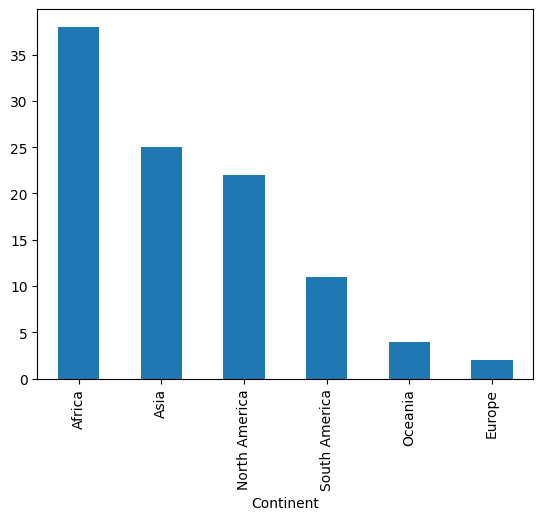

In [145]:
df['Continent'].value_counts().plot(kind='bar')
plt.xlabel('Continent')

# **which country produces maximum sugarcane contient wise?**

In [146]:
df

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0


In [147]:
df['Continent'].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


In [148]:
df_africa = df[df['Continent'] == 'Africa']
df_asia = df[df['Continent'] == 'Asia']
df_europe = df[df['Continent'] == 'Europe']
df_north_america = df[df['Continent'] == 'North America']
df_south_america = df[df['Continent'] == 'South America']
df_oceania = df[df['Continent'] == 'Oceania']

In [149]:
df_africa= df_africa.sort_values(by='Production_(Tons)', ascending=False)
df_asia= df_asia.sort_values(by='Production_(Tons)', ascending=False)
df_europe= df_europe.sort_values(by='Production_(Tons)', ascending=False)
df_south_america= df_south_america.sort_values(by='Production_(Tons)', ascending=False)
df_north_america= df_north_america.sort_values(by='Production_(Tons)', ascending=False)
df_oceania= df_oceania.sort_values(by='Production_(Tons)', ascending=False)

In [150]:
df_africa = df_africa.reset_index(drop=True)
df_asia = df_asia.reset_index(drop=True)
df_europe = df_europe.reset_index(drop=True)
df_south_america = df_south_america.reset_index(drop=True)
df_north_america = df_north_america.reset_index(drop=True)
df_oceania = df_oceania.reset_index(drop=True)


In [151]:


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


print(df_africa.head(1))


print(df_asia.head(1))

print(df_europe.head(1))


print(df_south_america.head(1))


print(df_north_america.head(1))


print(df_oceania.head(1))



  Country Continent  Production_(Tons)  Production per Person_(Kg)  \
0   Egypt    Africa         15760418.0                    161651.0   

   Acreage_(Hectare)  Yield_(Kg/Hectare)  
0           137011.0           1150306.0  
  Country Continent  Production_(Tons)  Production per Person_(Kg)  \
0   India      Asia        348448000.0                    260721.0   

   Acreage_(Hectare)  Yield_(Kg/Hectare)  
0          4950000.0            703935.0  
    Country Continent  Production_(Tons)  Production per Person_(Kg)  \
0  Portugal    Europe             5429.0                       528.0   

   Acreage_(Hectare)  Yield_(Kg/Hectare)  
0               62.0            882744.0  
  Country      Continent  Production_(Tons)  Production per Person_(Kg)  \
0  Brazil  South America        768678382.0                   3668531.0   

   Acreage_(Hectare)  Yield_(Kg/Hectare)  
0         10226205.0            751675.0  
  Country      Continent  Production_(Tons)  Production per Person_(Kg)  \
0  

#**Which country has the highest sugarcane production? using piechart**


In [152]:
df.head()

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [153]:
df["produc_per%"]=(df['Production_(Tons)']/df['Production_(Tons)'].sum())*100
df.head()
selected_data = df.loc[:, ["Country", "Continent", "Production_(Tons)", "produc_per%"]]
selected_data.head(5)

,Country,Continent,Production_(Tons),produc_per%
0,Brazil,South America,768678382.0,40.727285
1,India,Asia,348448000.0,18.462001
2,China,Asia,123059739.0,6.520138
3,Thailand,Asia,87468496.0,4.634389
4,Pakistan,Asia,65450704.0,3.467809


In [154]:
selected_data

,Country,Continent,Production_(Tons),produc_per%
0,Brazil,South America,768678382.0,4.072729e+01
1,India,Asia,348448000.0,1.846200e+01
2,China,Asia,123059739.0,6.520138e+00
3,Thailand,Asia,87468496.0,4.634389e+00
4,Pakistan,Asia,65450704.0,3.467809e+00
5,Mexico,North America,56446821.0,2.990751e+00
6,Colombia,South America,36951213.0,1.957805e+00
7,Australia,Oceania,34403004.0,1.822792e+00
8,Guatemala,North America,33533403.0,1.776718e+00
9,United States of America,North America,29926210.0,1.585596e+00


# **Diving the table top 5 and others to plot pie chart in clean way**

In [155]:
top_5 = selected_data.loc[0:4, ["Country","Production_(Tons)", "produc_per%"]]
top_5


,Country,Production_(Tons),produc_per%
0,Brazil,768678382.0,40.727285
1,India,348448000.0,18.462001
2,China,123059739.0,6.520138
3,Thailand,87468496.0,4.634389
4,Pakistan,65450704.0,3.467809


In [156]:
others_data = selected_data.loc[5:, ["Country","Production_(Tons)", "produc_per%"]]
others_data

,Country,Production_(Tons),produc_per%
5,Mexico,56446821.0,2.990751e+00
6,Colombia,36951213.0,1.957805e+00
7,Australia,34403004.0,1.822792e+00
8,Guatemala,33533403.0,1.776718e+00
9,United States of America,29926210.0,1.585596e+00
10,Indonesia,27158830.0,1.438970e+00
11,Philippines,22370546.0,1.185270e+00
12,Argentina,21990823.0,1.165151e+00
13,Cuba,18890972.0,1.000910e+00
14,Vietnam,16313145.0,8.643278e-01


In [157]:
others_per=others_data["produc_per%"].sum()
otherrs_prod=others_data["Production_(Tons)"].sum()

print(others_per)
print(otherrs_prod)

26.188378162979042
494274046.0


In [158]:
top_5=pd.concat([top_5, pd.DataFrame({"Country": ["Others"], "Production_(Tons)": [otherrs_prod], "produc_per%": [others_per]})], ignore_index=True)
top_5

,Country,Production_(Tons),produc_per%
0,Brazil,768678382.0,40.727285
1,India,348448000.0,18.462001
2,China,123059739.0,6.520138
3,Thailand,87468496.0,4.634389
4,Pakistan,65450704.0,3.467809
5,Others,494274046.0,26.188378


(np.float64(-1.0999913086372248),
 np.float64(1.0999994514081766),
 np.float64(-1.0999999777918519),
 np.float64(1.0999999989424691))

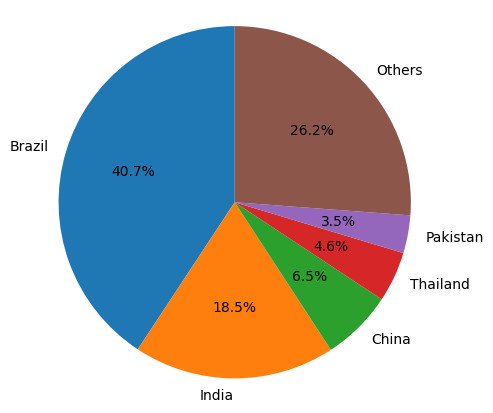

In [159]:
plt.figure(figsize=(5, 5))
plt.pie(top_5['produc_per%'], labels=top_5['Country'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')

In [160]:
df.corr(numeric_only=True)

,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%
Production_(Tons),1.000000,0.352369,0.997550,0.121125,1.000000
Production per Person_(Kg),0.352369,1.000000,0.341974,0.226719,0.352369
Acreage_(Hectare),0.997550,0.341974,1.000000,0.107826,0.997550
Yield_(Kg/Hectare),0.121125,0.226719,0.107826,1.000000,0.121125
produc_per%,1.000000,0.352369,0.997550,0.121125,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

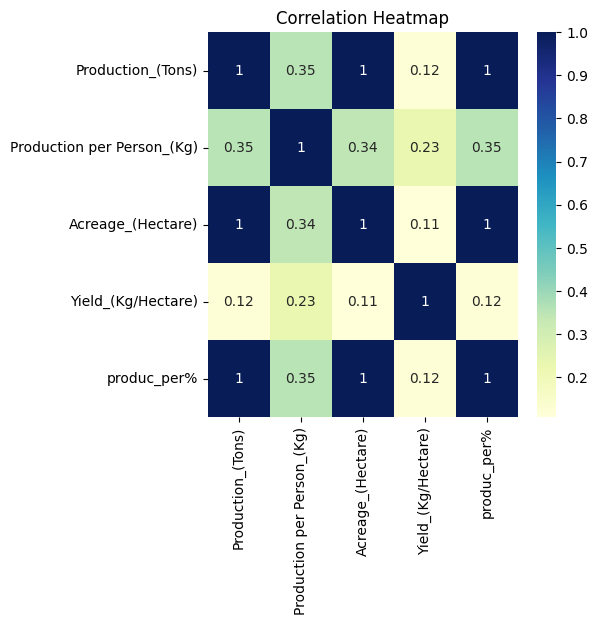

In [161]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')


# **Do countries with highest land produce more sugarcane?**

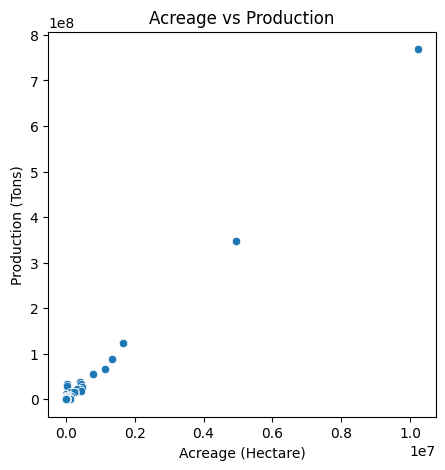

In [162]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='Acreage_(Hectare)', y='Production_(Tons)')
plt.xlabel('Acreage (Hectare)')
plt.ylabel('Production (Tons)')
plt.title('Acreage vs Production')
plt.show()

# **Do countries which yield more sugarcane per hecatre produces more sugarcane in total?**

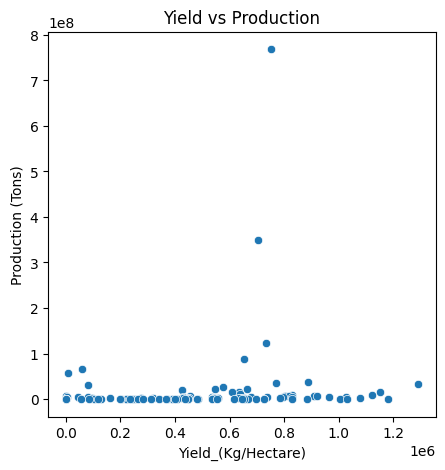

In [163]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='Yield_(Kg/Hectare)', y='Production_(Tons)')
plt.xlabel('Yield_(Kg/Hectare)')
plt.ylabel('Production (Tons)')
plt.title('Yield vs Production')
plt.show()

# **Using Seaborn Libraray**

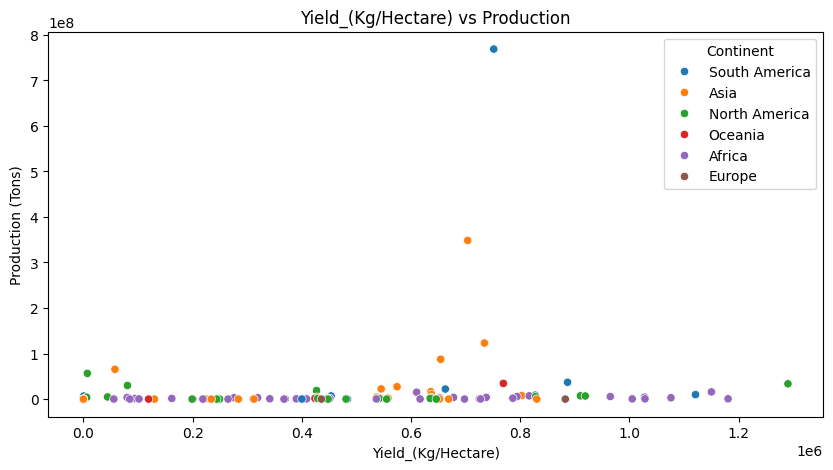

In [164]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Yield_(Kg/Hectare)', y='Production_(Tons)',hue='Continent')
plt.xlabel('Yield_(Kg/Hectare)')
plt.ylabel('Production (Tons)')
plt.title('Yield_(Kg/Hectare) vs Production')
plt.show()

# **which continent produces maximum sugarcane?**

In [165]:
df

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0,4.072729e+01
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0,1.846200e+01
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0,6.520138e+00
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0,4.634389e+00
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809e+00
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0,2.990751e+00
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0,1.957805e+00
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0,1.822792e+00
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0,1.776718e+00
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0,1.585596e+00


In [166]:
my_bar=df.groupby('Continent')['Production_(Tons)'].sum().sort_values(ascending=False)
print(my_bar)

Continent
South America    865588126.0
Asia             721930425.0
North America    173995947.0
Africa            89681472.0
Oceania           36177574.0
Europe                5823.0
Name: Production_(Tons), dtype: float64


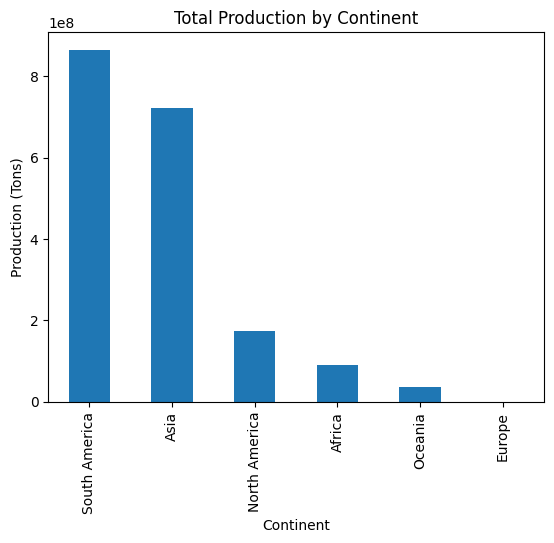

In [167]:
my_bar.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Production (Tons)')
plt.title('Total Production by Continent')
plt.show()
#

In [168]:
df

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0,4.072729e+01
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0,1.846200e+01
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0,6.520138e+00
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0,4.634389e+00
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809e+00
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0,2.990751e+00
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0,1.957805e+00
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0,1.822792e+00
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0,1.776718e+00
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0,1.585596e+00


In [169]:
country_count=df.Continent.value_counts()
df['country_count'] = df['Continent'].map(country_count)


In [170]:
df.head(5)

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%,country_count
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0,40.727285,11
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0,18.462001,25
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0,6.520138,25
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0,4.634389,25
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809,25


In [171]:
my2_bar = df.groupby('Continent')[['Production_(Tons)', 'country_count']].sum().sort_values(by='Production_(Tons)', ascending=False)
print(my2_bar)

               Production_(Tons)  country_count
Continent                                      
South America        865588126.0            121
Asia                 721930425.0            625
North America        173995947.0            484
Africa                89681472.0           1444
Oceania               36177574.0             16
Europe                    5823.0              4


<Axes: xlabel='Continent'>

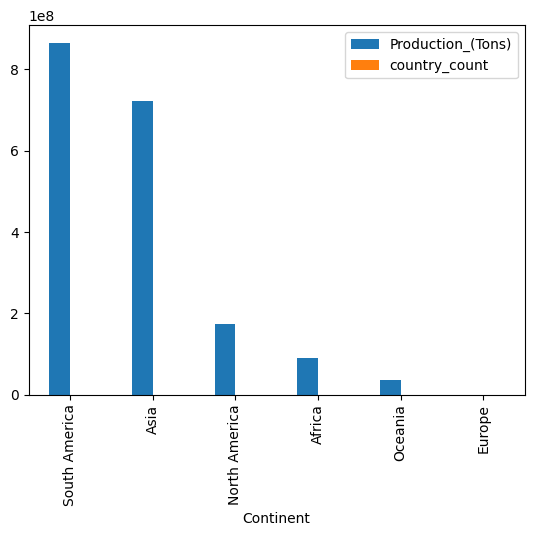

In [172]:
my2_bar.sort_values(by='Production_(Tons)', ascending=False).plot(kind='bar')


In [173]:
my3_bar = df.groupby('Continent')[['Production_(Tons)', 'country_count']].sum().sort_values(by='Production_(Tons)', ascending=False)
print(my2_bar)

               Production_(Tons)  country_count
Continent                                      
South America        865588126.0            121
Asia                 721930425.0            625
North America        173995947.0            484
Africa                89681472.0           1444
Oceania               36177574.0             16
Europe                    5823.0              4


# **Plot the top 10 countries by sugarcane production.**

In [174]:
df

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%,country_count
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0,4.072729e+01,11
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0,1.846200e+01,25
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0,6.520138e+00,25
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0,4.634389e+00,25
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809e+00,25
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0,2.990751e+00,22
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0,1.957805e+00,11
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0,1.822792e+00,4
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0,1.776718e+00,22
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0,1.585596e+00,22


In [175]:
top_10 = df.sort_values(by='Production_(Tons)', ascending=False).head(10)
print(top_10)

                    Country      Continent  Production_(Tons)  \
0                    Brazil  South America        768678382.0   
1                     India           Asia        348448000.0   
2                     China           Asia        123059739.0   
3                  Thailand           Asia         87468496.0   
4                  Pakistan           Asia         65450704.0   
5                    Mexico  North America         56446821.0   
6                  Colombia  South America         36951213.0   
7                 Australia        Oceania         34403004.0   
8                 Guatemala  North America         33533403.0   
9  United States of America  North America         29926210.0   

   Production per Person_(Kg)  Acreage_(Hectare)  Yield_(Kg/Hectare)  \
0                   3668531.0         10226205.0            751675.0   
1                    260721.0          4950000.0            703935.0   
2                     88287.0          1675215.0            734591.0

/tmp/ipython-input-458998651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Country', y='Production_(Tons)', palette='Blues_d')


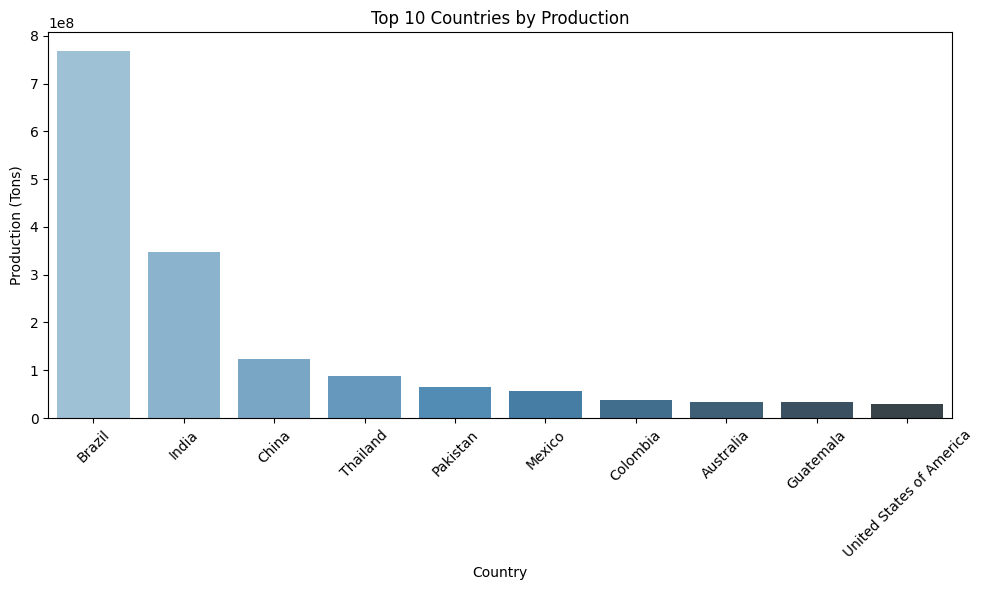

In [176]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='Country', y='Production_(Tons)', palette='Blues_d')

plt.xlabel('Country')
plt.ylabel('Production (Tons)')
plt.title('Top 10 Countries by Production')
plt.xticks(rotation=45)  # Rotate country names if needed
plt.tight_layout()
plt.show()

# **Which continent produces the most sugarcane? Plot in descending order.**

In [177]:
df.head(5)

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%,country_count
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0,40.727285,11
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0,18.462001,25
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0,6.520138,25
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0,4.634389,25
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809,25


In [178]:
df.groupby('Continent')['Production_(Tons)'].sum().sort_values(ascending=False).head(5)

,Production_(Tons)
Continent,
South America,865588126.0
Asia,721930425.0
North America,173995947.0
Africa,89681472.0
Oceania,36177574.0


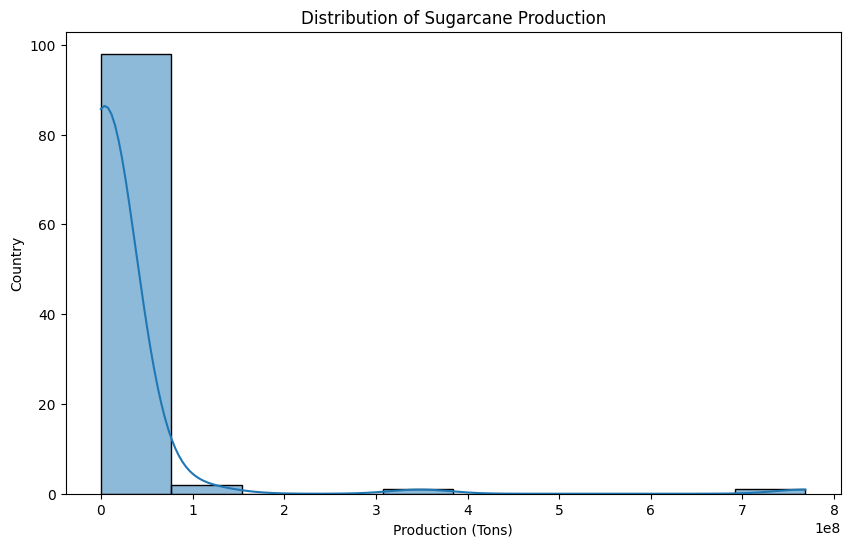

In [179]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Production_(Tons)', bins=10, kde=True)
plt.xlabel('Production (Tons)')
plt.ylabel('Country')
plt.title('Distribution of Sugarcane Production')
plt.show()

# **Compare the top 5 vs bottom 5 countries in terms of production.**

In [180]:
df.head

<bound method NDFrame.head of                               Country      Continent  Production_(Tons)  \
0                              Brazil  South America        768678382.0   
1                               India           Asia        348448000.0   
2                               China           Asia        123059739.0   
3                            Thailand           Asia         87468496.0   
4                            Pakistan           Asia         65450704.0   
5                              Mexico  North America         56446821.0   
6                            Colombia  South America         36951213.0   
7                           Australia        Oceania         34403004.0   
8                           Guatemala  North America         33533403.0   
9            United States of America  North America         29926210.0   
10                          Indonesia           Asia         27158830.0   
11                        Philippines           Asia         22370546.0   
12                          Argentina  South America         21990823.0   
13                               Cuba  North America         18890972.0   
14                            Vietnam           Asia         16313145.0   
15                              Egypt         Africa         15760418.0   
16                       South Africa         Africa         15074610.0   
17                            Myanmar           Asia         10437058.0   
18                               Peru  South America          9832526.0   
19                            Ecuador  South America          8661609.0   
20                               Iran           Asia          7687593.0   
21                        El Salvador  North America          7202141.0   
22                              Kenya         Africa          7094619.0   
23                            Bolivia  South America          6910805.0   
24                          Nicaragua  North America          6815147.0   
25                           Paraguay  South America          6708000.0   
26                          Swaziland         Africa          5583295.0   
27                              Sudan         Africa          5525059.0   
28                           Honduras  North America          5355700.0   
29                 Dominican Republic  North America          4717490.0   
30                              Nepal           Asia          4346754.0   
31                             Zambia         Africa          4285839.0   
32                         Bangladesh           Asia          4207592.0   
33                         Costa Rica  North America          4158370.0   
34                          Mauritius         Africa          3798448.0   
35                             Uganda         Africa          3723019.0   
36                           Zimbabwe         Africa          3483000.0   
37                          Venezuela  South America          3331252.0   
38                         Madagascar         Africa          3005641.0   
39                           Tanzania         Africa          2994127.0   
40                             Malawi         Africa          2915406.0   
41                         Mozambique         Africa          2761505.0   
42                             Panama  North America          2419638.0   
43                             Guyana  South America          2394553.0   
44                     Congo-Kinshasa         Africa          2191333.0   
45                               Laos           Asia          2019000.0   
46                      Côte d'Ivoire         Africa          1982661.0   
47                              Japan           Asia          1574000.0   
48                               Fiji        Oceania          1556692.0   
49                              Haiti  North America          1472712.0   
50                             Belize  North America          1457656.0   
51                            Jamaica  North America          1422432.

In [181]:
df.tail(5)


,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%,country_count
97,Spain,Europe,394.0,8.0,9.0,435965.0,2.087551e-05,2
98,Lebanon,Asia,97.0,16.0,3.0,283864.0,5.139401e-06,25
99,Singapore,Asia,50.0,9.0,2.0,25.0,2.649176e-06,25
100,Samoa,Oceania,12.0,6.0,1.0,119498.0,6.358022e-07,4
101,Syria,Asia,1.0,0.0,0.0,830342.0,5.298352e-08,25


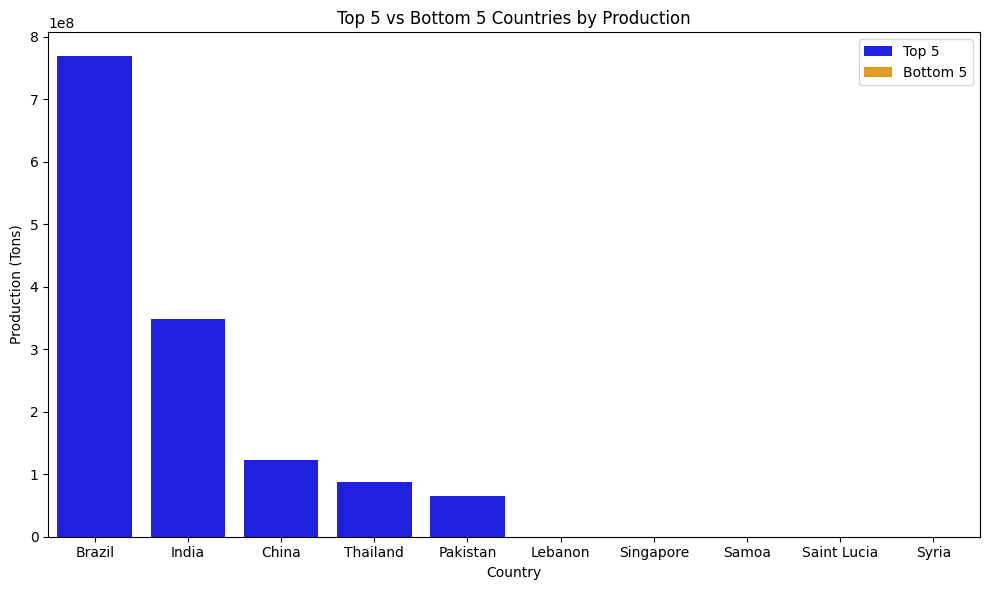

In [182]:
top=df.groupby('Country')['Production_(Tons)'].sum().sort_values(ascending=False).head(5)
bottom=df.groupby('Country')['Production_(Tons)'].sum().sort_values(ascending=False).tail(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top.index, y=top.values, label='Top 5', color='blue')
sns.barplot(x=bottom.index, y=bottom.values, label='Bottom 5', color='orange')
plt.title('Top 5 vs Bottom 5 Countries by Production')
plt.xlabel('Country')
plt.ylabel('Production (Tons)')
plt.tight_layout()
plt.show()

# **Create a pie chart showing continent-wise share of sugarcane      production**

In [183]:
pie_chart = df.groupby('Continent')['produc_per%'].sum().sort_values(ascending=False).reset_index().head(5)

In [184]:
pie_others = df.loc[6:, ["Country","produc_per%"]]

In [185]:
pie_data=pie_others['produc_per%'].sum()

In [186]:
pie_chart=pd.concat([pie_chart, pd.DataFrame({"Continent": ["Others"], "produc_per%": [pie_data]})], ignore_index=True)

In [187]:
pie_chart

,Continent,produc_per%
0,South America,45.861905
1,Asia,38.250414
2,North America,9.218918
3,Africa,4.751640
4,Oceania,1.916815
5,Others,23.197627


(np.float64(-1.0999967021145132),
 np.float64(1.0999998413805776),
 np.float64(-1.099998715361344),
 np.float64(1.0999999388269193))

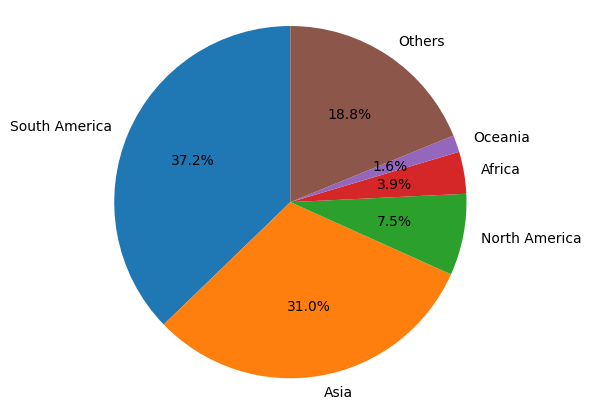

In [188]:
plt.figure(figsize=(5, 5))
plt.pie(pie_chart['produc_per%'], labels=pie_chart['Continent'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# **Plot countries producing more than 10 million tons of sugarcane**

In [189]:
df

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%,country_count
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0,4.072729e+01,11
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0,1.846200e+01,25
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0,6.520138e+00,25
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0,4.634389e+00,25
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809e+00,25
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0,2.990751e+00,22
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0,1.957805e+00,11
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0,1.822792e+00,4
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0,1.776718e+00,22
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0,1.585596e+00,22


In [190]:
top_ton = df.groupby('Country')['Production_(Tons)'].sum().sort_values(ascending=False).head(10)

In [191]:
top_ton


,Production_(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
Mexico,56446821.0
Colombia,36951213.0
Australia,34403004.0
Guatemala,33533403.0


In [192]:
filter_ton = top_ton[top_ton > 10_000_000]

In [193]:
filter_ton

,Production_(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
Mexico,56446821.0
Colombia,36951213.0
Australia,34403004.0
Guatemala,33533403.0


Text(0.5, 1.0, 'Countries Producing More Than 10 Million Tons of Sugarcane')

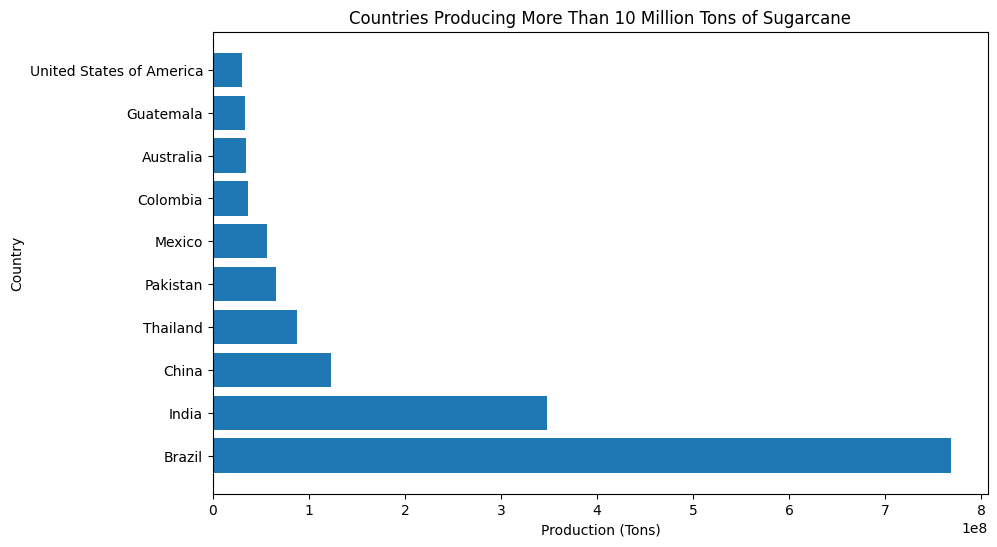

In [194]:
plt.figure(figsize=(10, 6))
plt.barh(y=filter_ton.index, width=filter_ton.values)
plt.xlabel('Production (Tons)')
plt.ylabel('Country')
plt.title('Countries Producing More Than 10 Million Tons of Sugarcane')

# **Which countries produce less than 1 million tons? Visualize them**

In [195]:
top_1m = df.groupby('Country')['Production_(Tons)'].sum().sort_values(ascending=False)

In [196]:
top_1m

,Production_(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
Mexico,56446821.0
Colombia,36951213.0
Australia,34403004.0
Guatemala,33533403.0


In [197]:
filter_1ton = top_1m[top_1m < 1_000_000]

In [198]:
filter_1ton

,Production_(Tons)
Country,
Sri Lanka,747907.0
Senegal,696992.0
Congo-Brazzaville,687365.0
Cambodia,610878.0
Angola,556094.0
Burkina Faso,484872.0
Chad,455986.0
Morocco,426503.0
Mali,365119.0


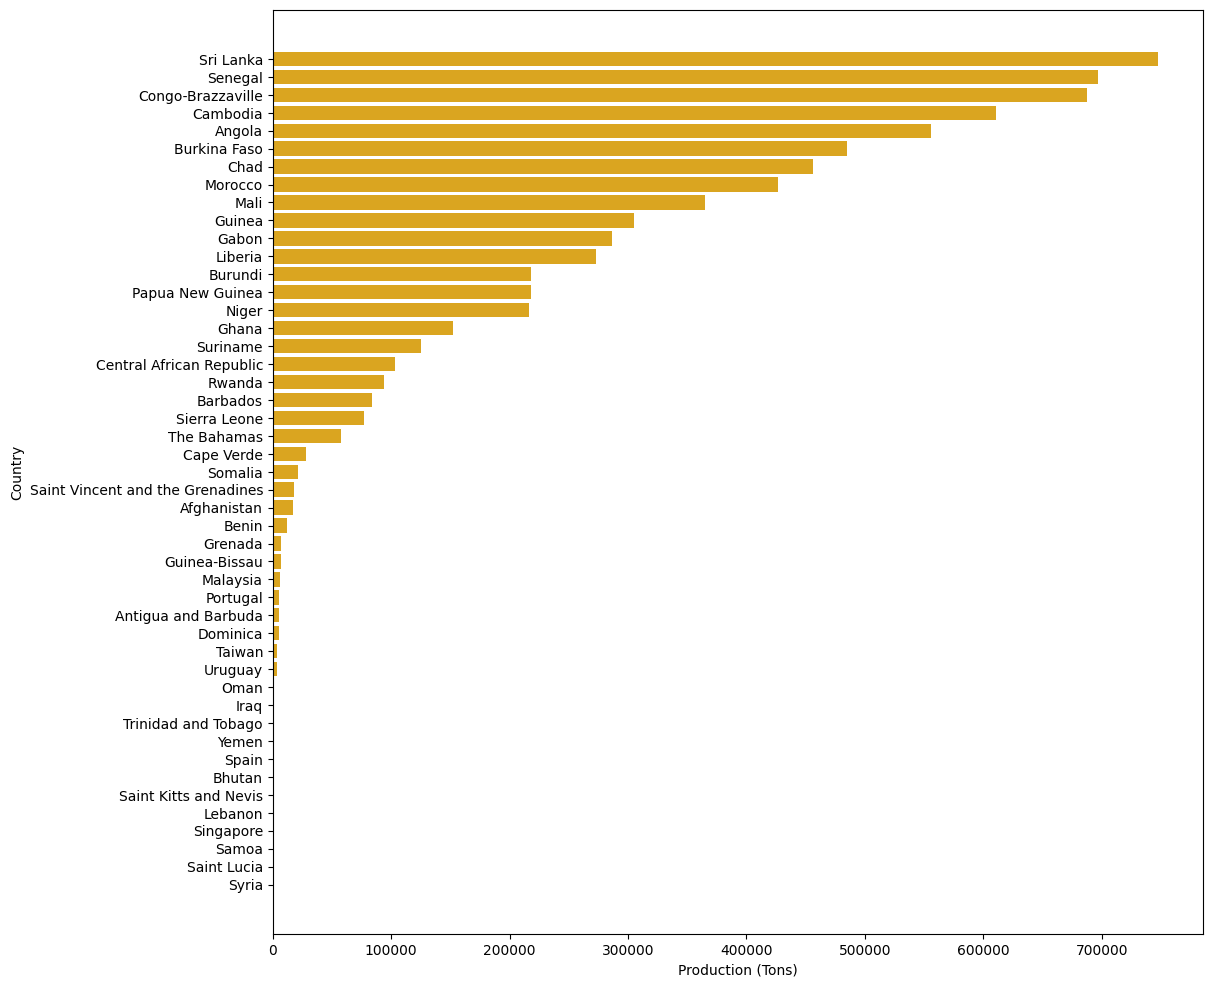

In [199]:
plt.figure(figsize=(12, 12))
plt.barh(y=filter_1ton.index, width=filter_1ton.values,color='goldenrod')
plt.xlabel('Production (Tons)')
plt.ylabel('Country')
plt.gca().invert_yaxis()

# **Plot the top 10 countries by production per person.**

In [200]:
df

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%,country_count
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0,4.072729e+01,11
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0,1.846200e+01,25
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0,6.520138e+00,25
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0,4.634389e+00,25
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809e+00,25
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0,2.990751e+00,22
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0,1.957805e+00,11
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0,1.822792e+00,4
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0,1.776718e+00,22
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0,1.585596e+00,22


In [201]:
top_10pers = df.groupby('Country')['Production per Person_(Kg)'].sum().sort_values(ascending=False).head(10)

In [202]:
top_10pers

,Production per Person_(Kg)
Country,
Swaziland,4816299.0
Belize,3682047.0
Brazil,3668531.0
Guyana,3061207.0
Mauritius,3002994.0
Saint Kitts and Nevis,2164315.0
Guatemala,1938114.0
Fiji,1759199.0
Cuba,1683528.0


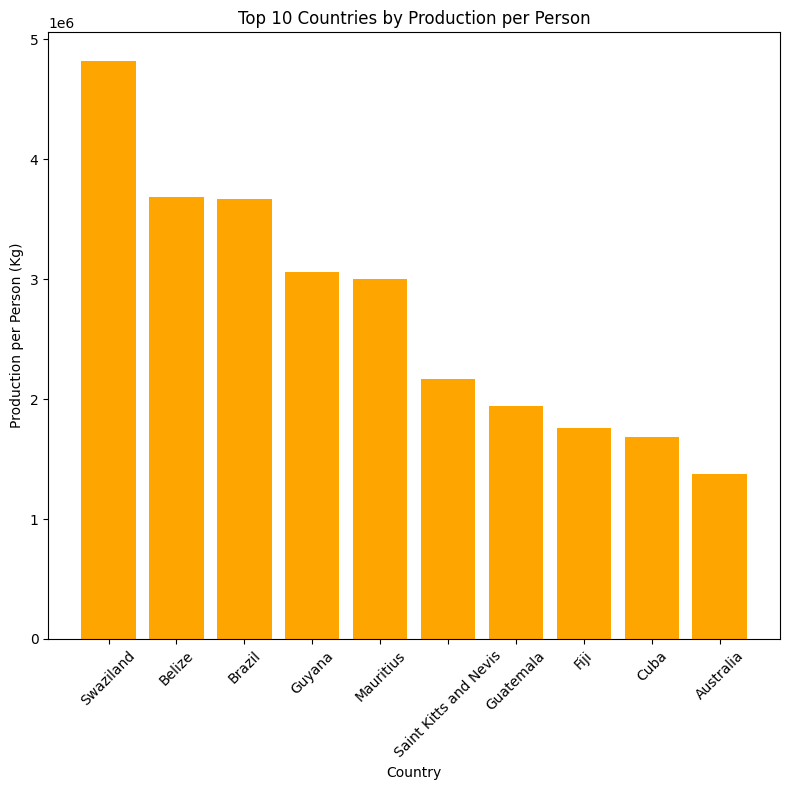

In [203]:
plt.figure(figsize=(8,8))
plt.bar(top_10pers.index, top_10pers.values, color='orange')
plt.xlabel('Country')
plt.ylabel('Production per Person (Kg)')
plt.title('Top 10 Countries by Production per Person')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()

# **Are there any outliers in production per person? Show using a boxplot.**

In [204]:
person_otliers = df.groupby('Country')['Production per Person_(Kg)'].sum().sort_values(ascending=False)

In [205]:
person_otliers

,Production per Person_(Kg)
Country,
Swaziland,4816299.0
Belize,3682047.0
Brazil,3668531.0
Guyana,3061207.0
Mauritius,3002994.0
Saint Kitts and Nevis,2164315.0
Guatemala,1938114.0
Fiji,1759199.0
Cuba,1683528.0


In [206]:
Q1 = person_otliers.quantile(0.25)
Q3 = person_otliers.quantile(0.75)

IQR = Q3 - Q1

Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

New_outliers = person_otliers[(person_otliers < Lower_bound) | (person_otliers > Upper_bound)]

In [207]:
New_outliers

,Production per Person_(Kg)
Country,
Swaziland,4816299.0
Belize,3682047.0
Brazil,3668531.0
Guyana,3061207.0
Mauritius,3002994.0
Saint Kitts and Nevis,2164315.0
Guatemala,1938114.0
Fiji,1759199.0
Cuba,1683528.0


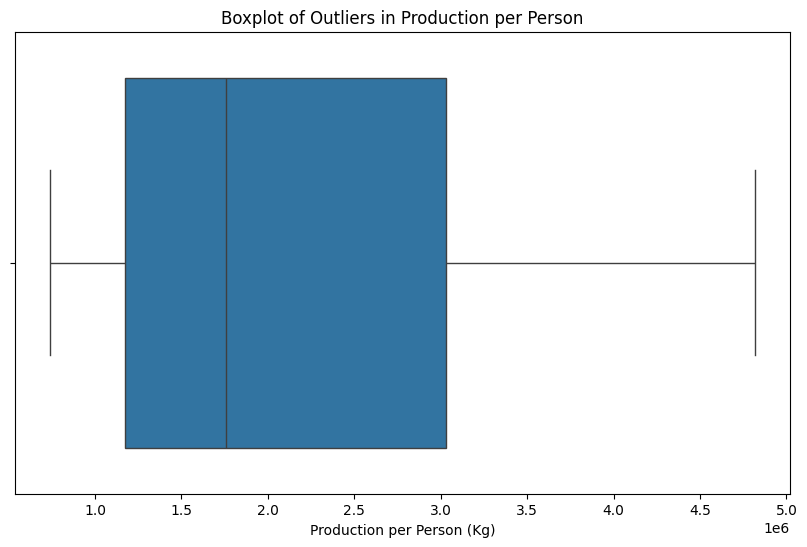

In [208]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=New_outliers)  # Directly pass the Series
plt.xlabel('Production per Person (Kg)')
plt.title('Boxplot of Outliers in Production per Person')
plt.show()


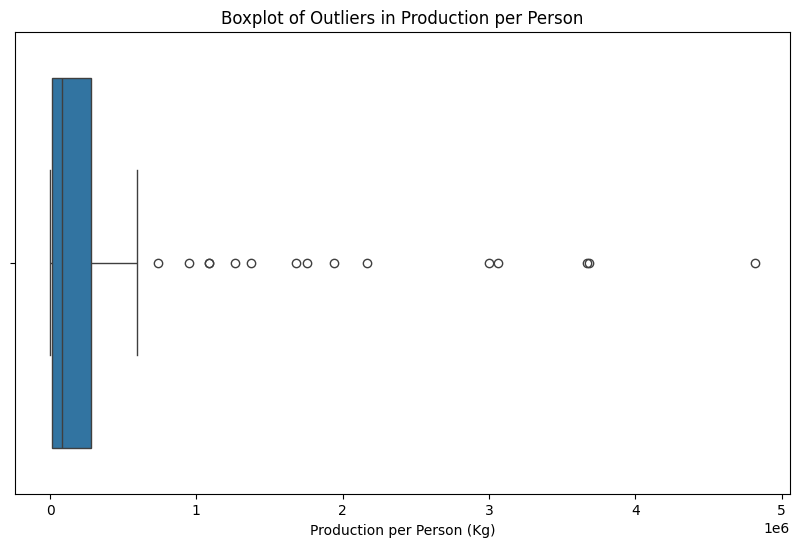

In [209]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=person_otliers)  # Directly pass the Series
plt.xlabel('Production per Person (Kg)')
plt.title('Boxplot of Outliers in Production per Person')
plt.show()

# **Compare average production per person by continent using a bar plot.**

In [210]:
avg_per = df.groupby('Continent')['Production per Person_(Kg)'].mean().sort_values(ascending=False).head(10)

In [211]:
avg_per

,Production per Person_(Kg)
Continent,
South America,929867.272727
Oceania,789516.500000
North America,700952.409091
Africa,266950.263158
Asia,124832.320000
Europe,268.000000


/tmp/ipython-input-946917937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_per.index, y=avg_per.values, palette='viridis')


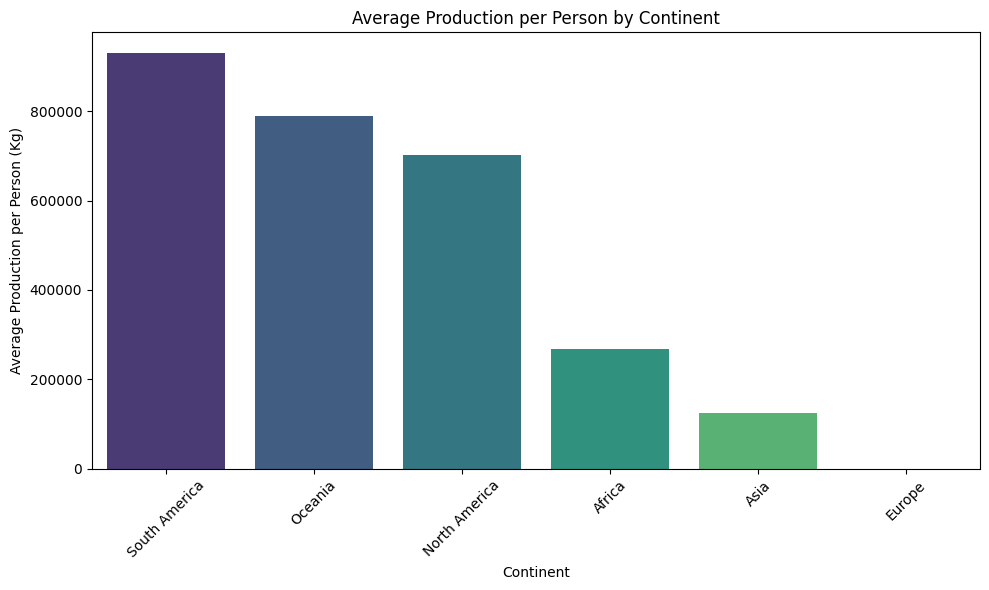

In [212]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_per.index, y=avg_per.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('Average Production per Person (Kg)')
plt.title('Average Production per Person by Continent')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()


# **How many countries are there in each continent? Plot a count plot.**

In [213]:
df

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%,country_count
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0,4.072729e+01,11
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0,1.846200e+01,25
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0,6.520138e+00,25
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0,4.634389e+00,25
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809e+00,25
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0,2.990751e+00,22
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0,1.957805e+00,11
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0,1.822792e+00,4
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0,1.776718e+00,22
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0,1.585596e+00,22


In [214]:
cc= df.groupby('Continent')['Country'].count().sort_values(ascending=False)

In [215]:
cc

,Country
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


/tmp/ipython-input-437454109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df.reset_index(), x='Continent', palette='pastel')


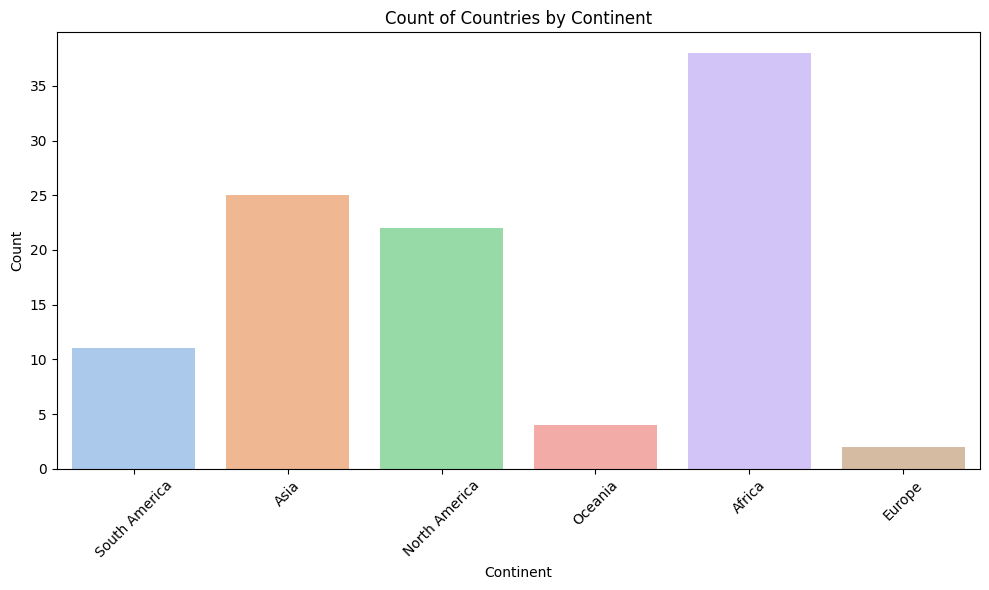

In [216]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df.reset_index(), x='Continent', palette='pastel')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Count of Countries by Continent')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()

# **Show a pie chart for percentage of countries per continent.**

In [217]:
pie3 = df.groupby('Continent')['Country'].count().sort_values(ascending=False).head(5)

In [218]:
pie3

,Country
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4


(np.float64(-1.099995259109914),
 np.float64(1.0999993028550334),
 np.float64(-1.0999998600952343),
 np.float64(1.0999999933378684))

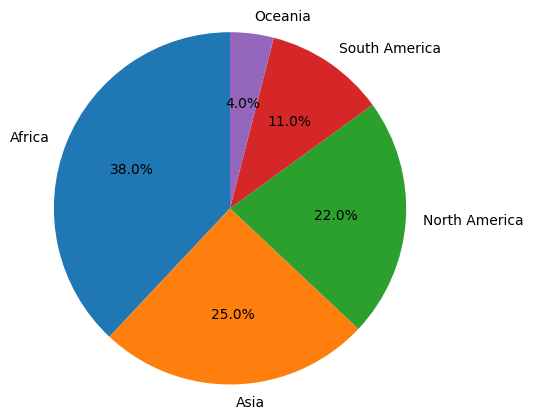

In [219]:
plt.figure(figsize=(5, 5))
plt.pie(pie3.values, labels=pie3.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')


# **Are there any continents with only a few sugarcane-producing countries?**

In [220]:
df

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%,country_count
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0,4.072729e+01,11
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0,1.846200e+01,25
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0,6.520138e+00,25
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0,4.634389e+00,25
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809e+00,25
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0,2.990751e+00,22
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0,1.957805e+00,11
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0,1.822792e+00,4
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0,1.776718e+00,22
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0,1.585596e+00,22


In [221]:
few_sugarcane = df.groupby('Continent')['Country'].nunique().sort_values(ascending=False).head(5)

In [222]:
few_sugarcane

,Country
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4


/tmp/ipython-input-812218373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=few_sugarcane.index, y=few_sugarcane.values, palette='viridis')


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

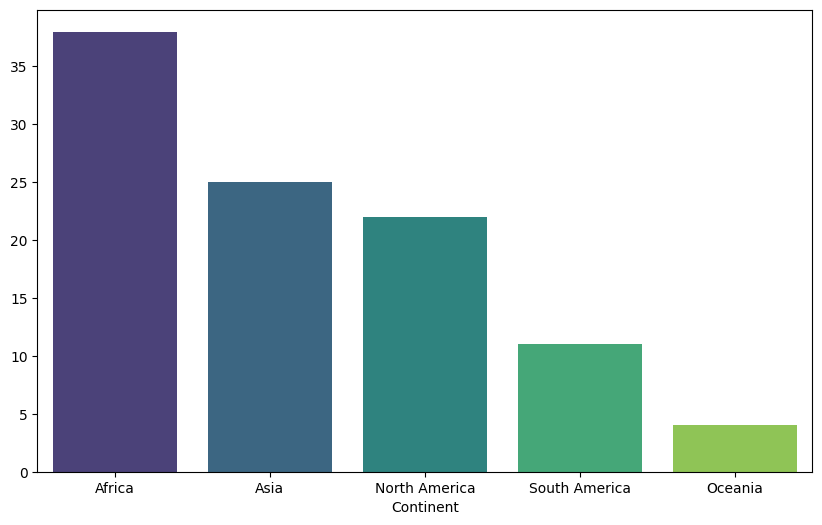

In [223]:
plt.figure(figsize=(10, 6))
sns.barplot(x=few_sugarcane.index, y=few_sugarcane.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel

# **Make a scatter plot of Production vs Production per Person.**

In [224]:
df.head(5)

,Country,Continent,Production_(Tons),Production per Person_(Kg),Acreage_(Hectare),Yield_(Kg/Hectare),produc_per%,country_count
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0,40.727285,11
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0,18.462001,25
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0,6.520138,25
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0,4.634389,25
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809,25


In [225]:
pt_pk = df[['Production_(Tons)', 'Production per Person_(Kg)', 'Continent']].sort_values(by='Production_(Tons)', ascending=False)

In [226]:
pt_pk.head(5)

,Production_(Tons),Production per Person_(Kg),Continent
0,768678382.0,3668531.0,South America
1,348448000.0,260721.0,Asia
2,123059739.0,88287.0,Asia
3,87468496.0,1264303.0,Asia
4,65450704.0,324219.0,Asia


In [227]:
pt_pk = df.groupby('Production_(Tons)')['Production per Person_(Kg)'].sum().sort_values(ascending=False)

In [228]:
pt_pk

,Production per Person_(Kg)
Production_(Tons),
5583295.0,4816299.0
1457656.0,3682047.0
768678382.0,3668531.0
2394553.0,3061207.0
3798448.0,3002994.0
100.0,2164315.0
33533403.0,1938114.0
1556692.0,1759199.0
18890972.0,1683528.0


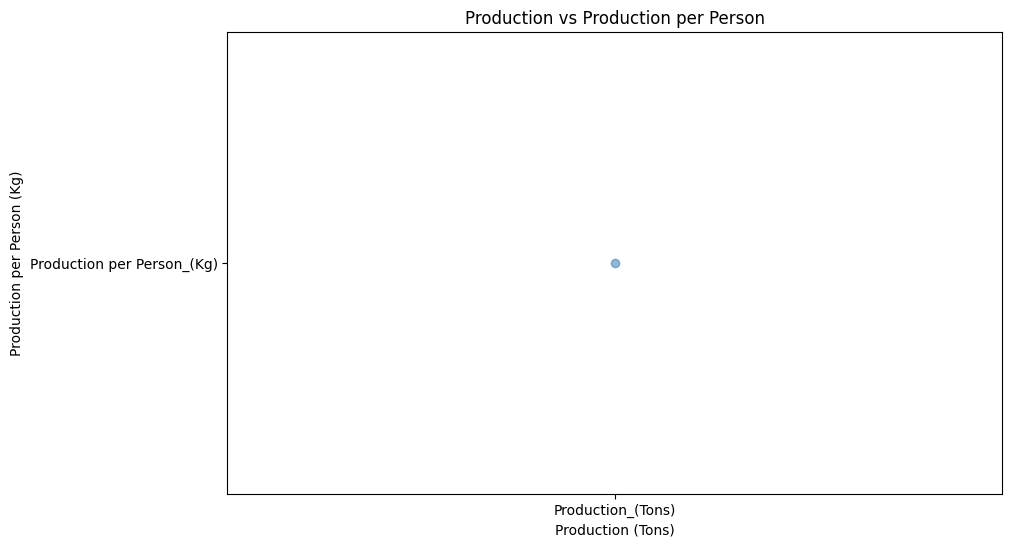

In [234]:
plt.figure(figsize=(10, 6))
plt.scatter(data=pt_pk, x='Production_(Tons)', y='Production per Person_(Kg)', alpha=0.5)
plt.xlabel('Production (Tons)')
plt.ylabel('Production per Person (Kg)')
plt.title('Production vs Production per Person')
plt.show()